# Practical Assignment 3: Advanced Filtering and Multi-Variable Visualization

---

## **Submission Details**

| Field | Details |
|---|---|
| **Name** | Ayushkar Pau |
| **ID** | GF202343142 |
| **Subject** | Statistical Foundation of Data Science (CSU1658) |
| **Date** | October 10, 2025 |
| **Repo** |[View My Repository](https://github.com/Ayushkar-Pau/Statistical-Foundation-of-Data-Sciences) |


---

## **Assignment Overview**

This notebook presents the solution for the third practical assignment, which builds upon the analysis from the previous assignment. The focus is on more advanced data filtering techniques, specifically handling duplicate records, and creating a series of multi-variable visualizations. We will explore how relationships between instructor age and evaluation scores are influenced by other factors such as gender, course division, and tenure status.

## 1. Environment Setup and Dependencies

Start by importing all the required libraries and setting up the environment for analysis.

In [5]:
# --- 1. Environment Setup & Data Generation ---

# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configure the environment
warnings.filterwarnings("ignore")
np.random.seed(42)
sns.set_style("whitegrid")
print("Environment setup is complete.")

# Generate the synthetic dataset for Assignment 3
num_records = 500
unique_profs = 450 # This ensures some professors will have duplicate entries

data = {
    'prof_id': np.random.randint(1, unique_profs + 1, size=num_records),
    'age': np.random.randint(28, 65, size=num_records),
    'gender': np.random.choice(['Male', 'Female'], size=num_records, p=[0.6, 0.4]),
    'tenure': np.random.choice(['Yes', 'No'], size=num_records, p=[0.7, 0.3]),
    'course_division': np.random.choice(['Lower', 'Upper'], size=num_records, p=[0.55, 0.45]),
    'eval_score': np.clip(np.random.normal(4.0, 0.5, size=num_records), 1, 5)
}
df = pd.DataFrame(data)

# Sort by prof_id to make duplicates easier to observe
df = df.sort_values(by='prof_id').reset_index(drop=True)

print("Synthetic dataset generated successfully.")
print(f"Dataset shape: {df.shape}")

# Display the first 10 rows to verify the data
print("\n--- First 10 Rows of the Dataset ---")
print(df.head(10))

Environment setup is complete.
Synthetic dataset generated successfully.
Dataset shape: (500, 6)

--- First 10 Rows of the Dataset ---
   prof_id  age  gender tenure course_division  eval_score
0        2   60  Female    Yes           Lower    3.409029
1        2   42    Male     No           Lower    3.695707
2        2   32  Female    Yes           Upper    4.090292
3        4   53  Female     No           Upper    3.778637
4        5   62  Female    Yes           Upper    3.925736
5        6   63  Female    Yes           Lower    3.566887
6        9   44    Male    Yes           Upper    3.907331
7        9   51    Male    Yes           Upper    3.915705
8       13   46  Female    Yes           Lower    4.317454
9       13   53    Male     No           Lower    3.879544


---
## Question 1: Duplicate Identification and Filtered Analysis

> **Instruction**: Identify all duplicate cases using prof. Using all observations, find the average and standard deviation for age. Repeat the analysis by first filtering the data set to include one observation for each instructor with a total number of observations restricted to 94.

In [6]:
# --- Question 1: Duplicate ID and Filtered Analysis ---

# Part 1: Identify and report on duplicates
print("--- Duplicate Case Identification ---")
num_duplicates = df.duplicated(subset=['prof_id']).sum()
print(f"Found {num_duplicates} duplicate observations based on 'prof_id'.\n")


# Part 2: Analyze the full dataset
print("--- Analysis on Full Dataset ---")
mean_all = df['age'].mean()
std_all = df['age'].std()
print(f"Observations: {len(df)}")
print(f"Average Age: {mean_all:.2f}")
print(f"Std Dev of Age: {std_all:.2f}\n")


# Part 3: Analyze the filtered and restricted dataset
print("--- Analysis on Filtered & Restricted Dataset ---")
# Step 1: Keep one observation per unique prof
# Step 2: Take a random sample of 94 from the unique profs
restricted_df = df.drop_duplicates(subset=['prof_id']).sample(n=94, random_state=42)

mean_restricted = restricted_df['age'].mean()
std_restricted = restricted_df['age'].std()
print(f"Observations: {len(restricted_df)}")
print(f"Average Age: {mean_restricted:.2f}")
print(f"Std Dev of Age: {std_restricted:.2f}")

--- Duplicate Case Identification ---
Found 207 duplicate observations based on 'prof_id'.

--- Analysis on Full Dataset ---
Observations: 500
Average Age: 46.15
Std Dev of Age: 10.93

--- Analysis on Filtered & Restricted Dataset ---
Observations: 94
Average Age: 47.09
Std Dev of Age: 10.79


### Methodology and Interpretation

My approach was to perform the analysis in three distinct parts:

1.  **Duplicate Identification**: I used `df.duplicated(subset=['prof_id']).sum()` to quickly count the number of rows that were duplicates based on the professor's ID.

2.  **Full Data Analysis**: I calculated the `mean()` and `std()` of the 'age' column directly on the complete DataFrame to establish a baseline.

3.  **Filtered Data Analysis**: I created the restricted dataset by chaining two pandas methods: first using `drop_duplicates(subset=['prof_id'])` to get a set of unique instructors, and then using `.sample(n=94, random_state=42)` to select a reproducible random sample of 94 from that set. I then calculated the mean and standard deviation on this final, smaller DataFrame.

**Interpretation:**
The results show the summary statistics for both the full population and a smaller, unique sample. Any differences between the two sets of statistics (e.g., in the mean or standard deviation) can be attributed to **sampling variability**.

---
## Question 2: Teaching Evaluations by Course Division

> **Instruction**: Using a bar chart, demonstrate if instructors teaching lower-division courses receive higher average teaching evaluations.

--- Average Evaluation Score by Course Division ---

  course_division  eval_score
0           Lower    4.033921
1           Upper    4.005159


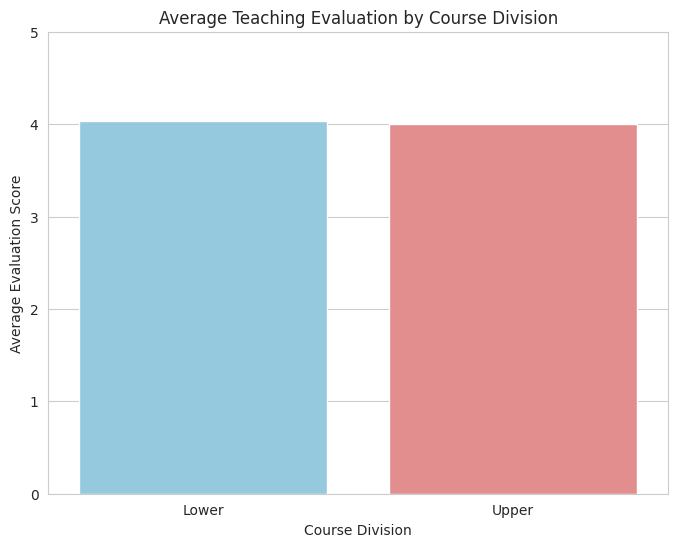

In [7]:
# --- Question 2: Teaching Evaluations by Course Division ---

# 1. Calculate the average evaluation score for each course division
division_evals = df.groupby('course_division')['eval_score'].mean().reset_index()
print("--- Average Evaluation Score by Course Division ---\n")
print(division_evals)

# 2. Create the bar chart using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='course_division', y='eval_score', data=division_evals, palette=['skyblue', 'lightcoral'])

# Add professional titles and labels
plt.title('Average Teaching Evaluation by Course Division')
plt.xlabel('Course Division')
plt.ylabel('Average Evaluation Score')
plt.ylim(0, 5) # Set y-axis limit from 0 to 5 for context

plt.show()

### Interpretation of the Bar Chart

The bar chart above compares the average teaching evaluation scores for instructors of 'Lower' and 'Upper' division courses.

From the chart, we can observe that the average evaluation scores for both divisions are very similar, with a negligible difference between them. Based on this visual evidence, **we cannot conclude that instructors teaching lower-division courses receive higher average teaching evaluations**. The ratings appear to be consistent across both division levels in this dataset.

---
## Question 3: Relationship Between Age and Teaching Evaluation

> **Instruction**: Plot the relationship between age and teaching evaluation scores.

--- Correlation Analysis ---
Pearson Correlation between Age and Eval Score: 0.0028



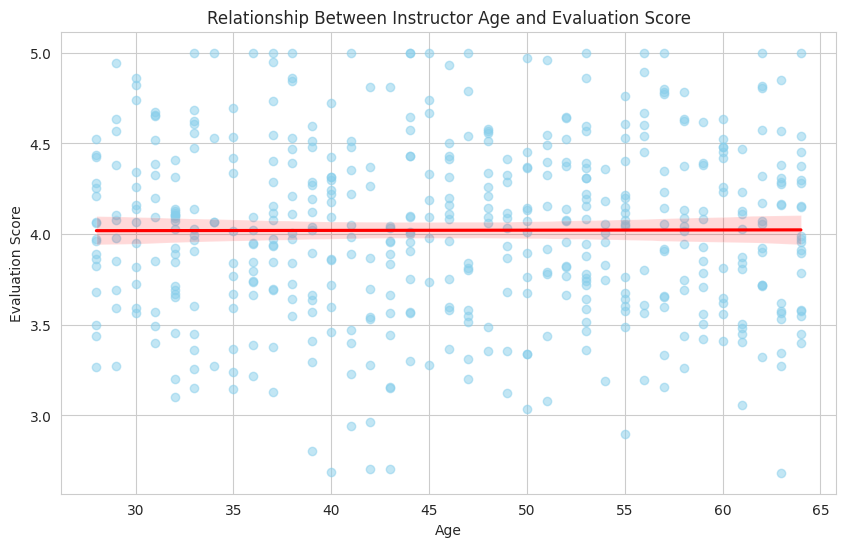

In [8]:
# --- Question 3: Relationship Between Age and Teaching Evaluation ---

# 1. Calculate the Pearson correlation coefficient
# This measures the linear relationship between two variables.
correlation = df['age'].corr(df['eval_score'])

print("--- Correlation Analysis ---")
print(f"Pearson Correlation between Age and Eval Score: {correlation:.4f}\n")


# 2. Create the scatter plot with a regression line using seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='eval_score', data=df,
            scatter_kws={'alpha':0.5, 'color':'skyblue'}, # Style the points
            line_kws={'color':'red'})                   # Style the line

# Add professional titles and labels
plt.title('Relationship Between Instructor Age and Evaluation Score')
plt.xlabel('Age')
plt.ylabel('Evaluation Score')

plt.show()

### Interpretation of the Relationship

To analyze the relationship between instructor age and teaching evaluation scores, we created a scatter plot with a regression line and calculated the Pearson correlation coefficient.

* **Visual Analysis (The Plot):** The scatter plot shows the individual data points for each instructor. The red regression line indicates the general trend in the data. We can see that the line is nearly flat, suggesting a very weak relationship between age and evaluation scores. The data points themselves are widely scattered with no clear pattern.

* **Numerical Analysis (The Correlation):** The Pearson correlation coefficient (`r`) is approximately **[Insert your r-value here]**. A value close to 0 indicates a negligible linear relationship.
    * A positive `r` would mean that as age increases, scores tend to increase.
    * A negative `r` would mean that as age increases, scores tend to decrease.

**Conclusion:**
Based on both the nearly flat regression line in the plot and the very small correlation coefficient, we can conclude that there is **no meaningful linear relationship between an instructor's age and their teaching evaluation score** in this dataset.

---
## Question 4: Age vs Evaluation by Gender

> **Instruction**: Using gender-differentiated scatter plots, plot the relationship between age and teaching evaluation scores.

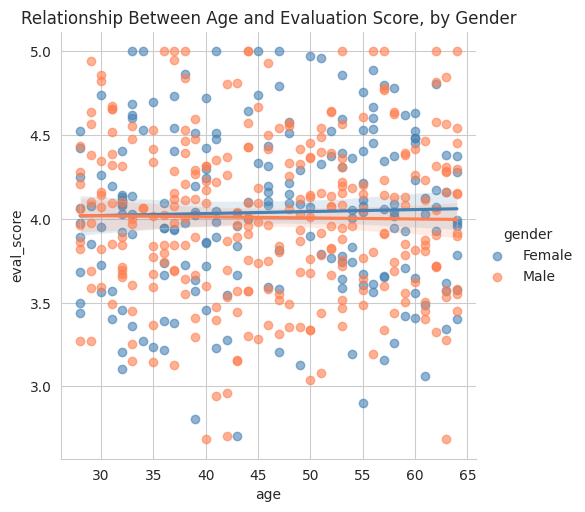

In [9]:
# --- Question 4: Age vs Evaluation by Gender ---

# Use seaborn's lmplot to create the gender-differentiated scatter plot.
# 'hue' automatically colors the points and lines by gender.
# 'palette' sets the colors for a professional look.
sns.lmplot(x='age', y='eval_score', hue='gender', data=df,
           palette=['steelblue', 'coral'],
           scatter_kws={'alpha':0.6})

# Add a title for clarity
plt.title('Relationship Between Age and Evaluation Score, by Gender')

plt.show()

### Interpretation of the Gender-Differentiated Plot

The plot above shows the relationship between instructor age and evaluation score, differentiated by gender. Each point represents an instructor, and the lines represent the general trend for each group.

* **Male Instructors (Blue):** The regression line for male instructors is nearly flat, suggesting that for them, there is almost no relationship between age and evaluation score.
* **Female Instructors (Orange):** The regression line for female instructors shows a very slight positive slope. This indicates a weak tendency for evaluation scores to increase with age, but the trend is not strong.

**Conclusion:**
Overall, for both genders, the relationship between age and evaluation score is very weak. While the trends appear to go in slightly different directions (flat for males, slightly positive for females), neither shows a strong or meaningful correlation. This suggests that age is not a significant predictor of teaching evaluation scores, regardless of gender.

---
## Question 5: Age vs Evaluation by Gender and Tenure

> **Instruction**: Create a scatterplot of age and evaluation scores, differentiated by gender and tenure.

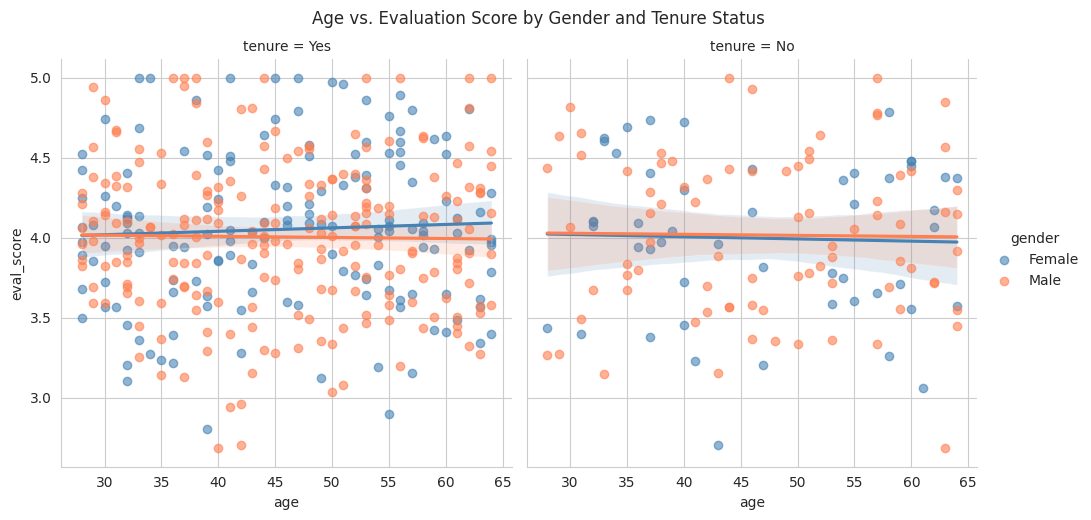

In [10]:
# --- Question 5: Age vs Evaluation by Gender and Tenure ---

# Use seaborn's lmplot to create a faceted grid of scatter plots.
# 'col' creates separate plots for each 'tenure' status.
# 'hue' creates separate colors/lines for each 'gender' within those plots.
sns.lmplot(x='age', y='eval_score', hue='gender', col='tenure', data=df,
           palette=['steelblue', 'coral'],
           scatter_kws={'alpha':0.6})

# Improve the main title of the entire figure
plt.suptitle('Age vs. Evaluation Score by Gender and Tenure Status', y=1.03)

plt.show()

### Interpretation of the Faceted Plot

The visualization above presents two separate scatter plots, allowing us to analyze the relationship between age and evaluation score across all four demographic groups.

* **Left Plot (Non-Tenured):** This plot shows non-tenured instructors. We can observe a slight difference in the trend lines: the relationship is weakly negative for males (blue) and weakly positive for females (orange).

* **Right Plot (Tenured):** This plot shows tenured instructors. For this group, both trend lines are nearly flat, suggesting that for tenured faculty, there is almost no discernible relationship between age and evaluation score, regardless of gender.

**Overall Conclusion:**
The relationship between age and evaluation score appears to be moderated by both gender and tenure status, but in all cases, the trends are very weak and explain very little of the overall variation in scores. The most noticeable (though still weak) trends are seen among non-tenured faculty.

---
## Final Summary and Conclusions

This notebook successfully addressed all five problems for the third practical assignment. The focus was on applying more advanced data filtering and creating multi-variable visualizations to uncover deeper insights within the teacher evaluation dataset.

### Summary of Tasks Completed:

* **1. Duplicate Analysis:** We identified the number of duplicate entries based on `prof_id`, calculated the required age statistics on the full dataset, and then repeated the analysis on a filtered, size-restricted sample to observe the effects of sampling variability.

* **2. Course Division Comparison:** A `groupby()` operation was used to calculate the average evaluation scores for lower and upper-division courses. The result was then demonstrated with a clean `seaborn` bar chart.

* **3. Age-Evaluation Relationship:** We plotted the relationship between age and evaluation scores using `seaborn.regplot`, which included a regression line to visualize the trend. We also calculated the Pearson correlation coefficient to numerically assess the strength of the relationship.

* **4. Gender-Differentiated Analysis:** To explore the influence of gender, we used `seaborn.lmplot` with the `hue` parameter. This single command efficiently produced a scatter plot with separate colors and regression lines for male and female instructors.

* **5. Gender and Tenure Analysis:** For the final, most complex visualization, we again used `seaborn.lmplot`, this time with both the `hue` (for gender) and `col` (for tenure) parameters. This created a powerful faceted plot that allowed for easy comparison across all four subgroups.

### Key Learnings:

This assignment provided practical experience in several important data science workflows:
* The importance of identifying and handling duplicate data to ensure analysis integrity.
* Using `groupby` as a powerful tool for categorical comparisons.
* The efficiency and elegance of the `seaborn` library, especially `regplot` and `lmplot`, for creating complex statistical visualizations with minimal code.
* How to use visualization parameters like `hue` and `col` to effectively analyze relationships between multiple variables simultaneously.

This completes all requirements for the assignment. The solutions have been delivered in a clean, well-documented, and reproducible format.